In [1]:
##########################################################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2
from PIL import Image
import numpy as np

image_directory = 'cell_images/'
SIZE = 224
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.



In [2]:

affected_images = os.listdir(image_directory + 'affected/')
for i, image_name in enumerate(affected_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'affected//' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

not_affected_images = os.listdir(image_directory + 'not_affected/')
for i, image_name in enumerate(not_affected_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'not_affected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


In [3]:
dataset = np.array(dataset)
label = np.array(label)

from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

#Without scaling (normalize) the training may not converge. 
#Normalization is a rescaling of the data from the original range 
#so that all values are within the range of 0 and 1.
from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [4]:
INPUT_SHAPE = (SIZE, SIZE, 3)  

In [5]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import os

In [6]:
image_size=[224,224]
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
x = Flatten()(vgg.output)
x=Dropout(0.1)(x)


x = Dense(1000, activation='relu')(x)
x=Dropout(0.1)(x)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
x=Dropout(0.1)(x)



prediction = Dense(1, activation='sigmoid')(x) 

In [8]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
#create a model object
model = Model(inputs=vgg.input, outputs=prediction)


# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 32, 
                         verbose = 1, 
                         epochs = 5,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


Epoch 1/5
151/151 [==============================] - 1007s 7s/step - loss: 0.4338 - accuracy: 0.8461 - val_loss: 0.2067 - val_accuracy: 0.9119
Epoch 2/5
151/151 [==============================] - 990s 7s/step - loss: 0.2126 - accuracy: 0.9058 - val_loss: 0.1760 - val_accuracy: 0.9185
Epoch 3/5
151/151 [==============================] - 948s 6s/step - loss: 0.1805 - accuracy: 0.9237 - val_loss: 0.1258 - val_accuracy: 0.9543
Epoch 4/5
151/151 [==============================] - 952s 6s/step - loss: 0.1508 - accuracy: 0.9359 - val_loss: 0.1453 - val_accuracy: 0.9443
Epoch 5/5
151/151 [==============================] - 950s 6s/step - loss: 0.1370 - accuracy: 0.9391 - val_loss: 0.1058 - val_accuracy: 0.9643


In [11]:
model.save('brain_tumor.h5')  

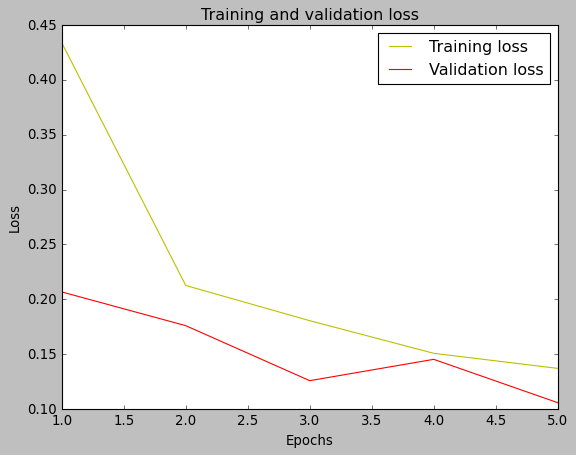

In [12]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

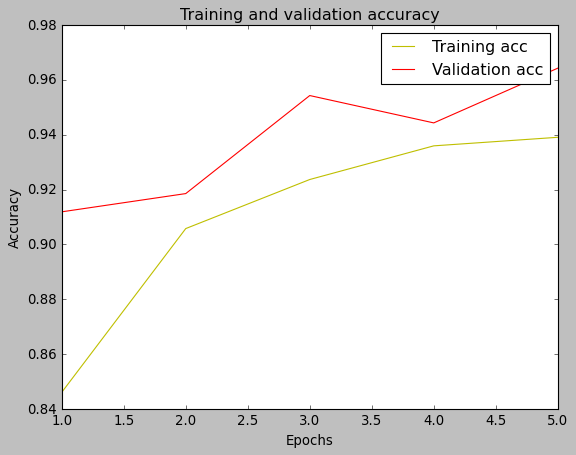

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model.evaluate(X_test,y_test)

38/38 [==============================] - 160s 4s/step - loss: 0.1058 - accuracy: 0.9643


[0.10575519502162933, 0.9642560482025146]

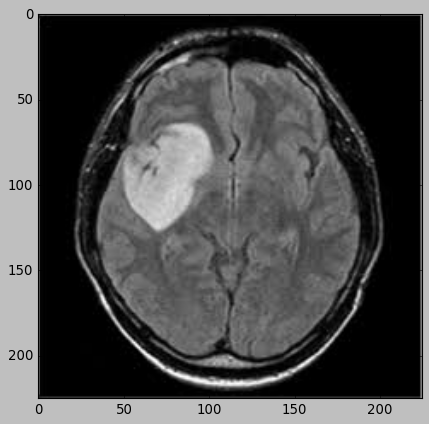

In [24]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('Y4.jpg')    
plt.imshow(img)
plt.show()

In [26]:
import numpy as np  
from tensorflow.keras.preprocessing import image  
test_image = image.load_img('Y4.jpg', target_size = (224,224))  
test_image = image.img_to_array(test_image)  
test_image = np.expand_dims(test_image, axis = 0) 
result = model.predict(test_image) 


if result[0][0] == 1:  
  prediction = 'affected tumor'  
elif result[0][0]==0:  
  prediction = 'no tumor'
else:
    print("unknown")

  
print(prediction)  

1/1 [==============================] - 0s 141ms/step
affected tumor


In [27]:
from keras.models import load_model
# load model
model = load_model('brain_tumor.h5')

#For 300 epochs, giving 82.5% accuracy

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

38/38 [==============================] - 167s 4s/step - loss: 0.1058 - accuracy: 0.9643
Accuracy =  96.42560482025146 %


In [28]:

mythreshold=0.908
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

38/38 [==============================] - 204s 5s/step
[[892   5]
 [ 83 223]]


38/38 [==============================] - 198s 5s/step


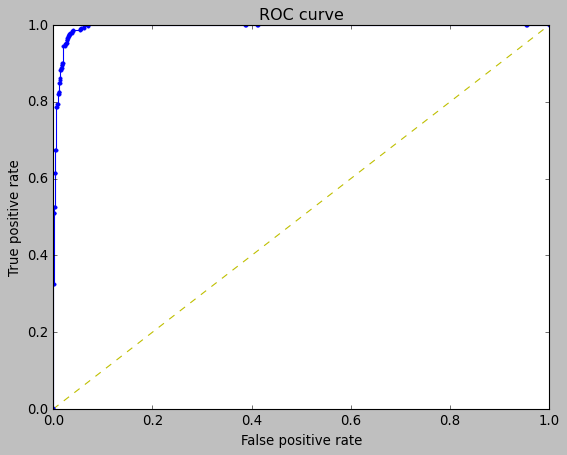

In [29]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

<AxesSubplot:>

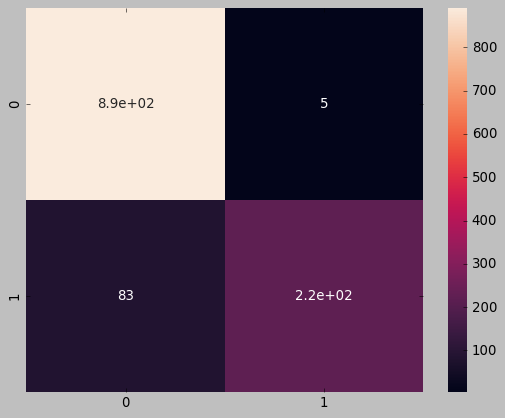

In [30]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<AxesSubplot:>

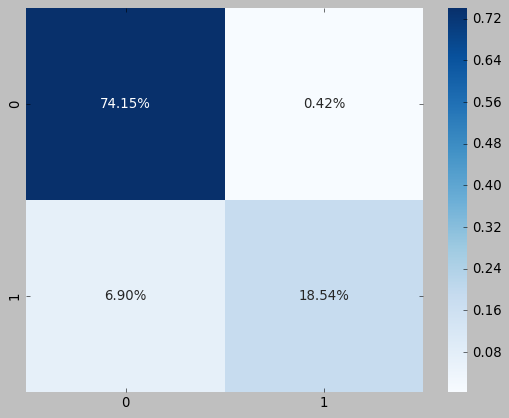

In [32]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')